In [2]:
import pyarrow
import fastparquet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
print(pyarrow.__version__)

19.0.0


In [4]:
print(fastparquet.__version__)

2024.11.0


- Fam file contains population/sample information
- Bim file contains information on the SNP position (basepair and centimorgan)
- parquet file contains the snp data

- Below is examples of how to read the data using pandas/numpy.
- I have also included a .eigenstratgeno file, which is a raw text file with the SNP data. It is large, and slow to read, so i would recommend the parquet file.

# - *Fam*

In [12]:
fam = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", delimiter = " ", header = None).to_numpy()

In [56]:
fam.dtype, fam.shape

(dtype('O'), (2067, 6))

- `dtype('0')` in NumPy stands for "object" data type. This means that the array contains Python objects (e.g., strings, mixed types, or other non-primitive types).


In [57]:
columns = ["Family ID", "Individual ID", "Paternal ID","Maternal ID","Sex", "Phenotype"]

fam_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.fam", sep="\s+", names=columns)

In [58]:
fam_df.describe()

,Paternal ID,Maternal ID,Sex,Phenotype
count,2067.0,2067.0,2067.0,2067.0
mean,0.0,0.0,0.0,1.0
std,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,1.0
75%,0.0,0.0,0.0,1.0
max,0.0,0.0,0.0,1.0


In [59]:
fam_df[1397:1406]

,Family ID,Individual ID,Paternal ID,Maternal ID,Sex,Phenotype
1397,Pathan,HGDP00254,0,0,0,1
1398,Pathan,HGDP00258,0,0,0,1
1399,Pathan,HGDP00259,0,0,0,1
1400,Pathan,HGDP00262,0,0,0,1
1401,Pathan,HGDP00264,0,0,0,1
1402,Punjabi,HG02491,0,0,0,1
1403,Punjabi,HG02600,0,0,0,1
1404,Punjabi,HG02601,0,0,0,1
1405,Punjabi,HG02687,0,0,0,1


In [60]:
fam_df.isnull().sum()  # Count missing values per column

Family ID        0
Individual ID    0
Paternal ID      0
Maternal ID      0
Sex              0
Phenotype        0
dtype: int64

In [61]:
# Count how many unique Family IDs
unique_families = np.unique(fam[:, 0])
print(f"Number of unique family IDs: {len(unique_families)}")

Number of unique family IDs: 166


In [54]:
sex_column = fam[:, 4]

# Count the occurrences of males and females
males = np.sum(sex_column == 1)  # males
females = np.sum(sex_column == 2)  # females

print(f"Number of males: {males}, Number of females: {females}")

Number of males: 0, Number of females: 0


In [55]:
phenotype_column = fam[:, 5]

# Count the number of affected individuals
affected = np.sum(phenotype_column == 1)
print(f"Number of affected individuals: {affected}")

Number of affected individuals: 2067


Unique values: [0]
Counts: [2067]


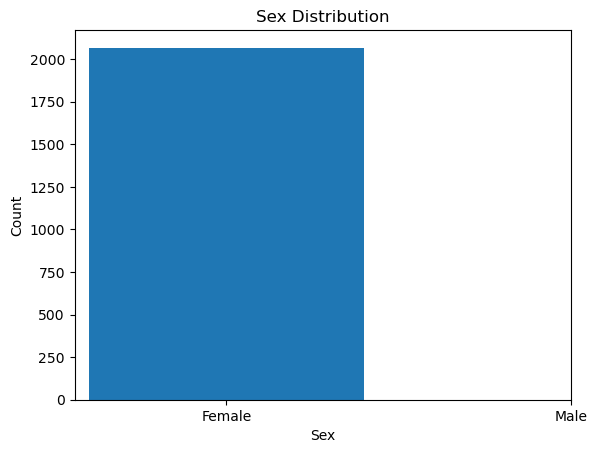

In [11]:
# Count unique values in column 4 (assuming it's Sex)
unique_values, counts = np.unique(fam[:, 4], return_counts=True)

# Print counts
print("Unique values:", unique_values)
print("Counts:", counts)

# Plot using Matplotlib
plt.bar(unique_values, counts)
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.xticks([0, 1], ['Female', 'Male'])  # Adjust labels if necessary
plt.show()

# - *bim*
 *This `.bim file` is a `PLINK BIM` (binary map) file used in genetics and bioinformatics. It provides information about genetic variants (SNPs) in a dataset.*

In [15]:
bim = np.genfromtxt("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", usecols=(0, 1, 2, 3, 4, 5), dtype=str)

In [45]:
bim.shape , bim.dtype

((160858, 6), dtype('<U16'))

- `dtype('<U16')` in NumPy means that the array contains Unicode strings with a maximum length of 16 characters.

In [49]:
columns = ["Chromosome", "SNP_ID", "Genetic_Distance", "Position", "Ref_Allele", "Alt_Allele"]

bim_df = pd.read_csv("HO_data/HO_data_filtered/HumanOrigins2067_filtered.bim", sep="\s+", names=columns)

In [51]:
bim_df.head(5)

,Chromosome,SNP_ID,Genetic_Distance,Position,Ref_Allele,Alt_Allele
0,1,rs3094315,0.020130,752566,G,A
1,1,rs7419119,0.022518,842013,G,T
2,1,rs13302957,0.024116,891021,G,A
3,1,rs6696609,0.024457,903426,T,C
4,1,rs8997,0.025727,949654,A,G


*.Chromosome 1*

*.`SNP ID`: unique identifier for this SNP - Reference SNP identifier -rsID*

*.`Genetic Distance`: cM - Centimorgans (may not always be used)*

*.`Physical Position`: this SNP is located at base pair 752,566 on chromosome 1*

*.`Reference Allele`: G - major allele*

*.`Alternative Allele`: A - minor allele*

In [50]:
bim_df.describe()

,Chromosome,Genetic_Distance,Position
count,160858.000000,160858.000000,1.608580e+05
mean,8.991744,0.930690,7.849409e+07
std,5.945411,0.590934,5.802305e+07
min,1.000000,0.000013,1.968800e+04
25%,4.000000,0.473851,3.021285e+07
50%,8.000000,0.848425,6.873518e+07
75%,13.000000,1.299260,1.164211e+08
max,22.000000,2.862305,2.491684e+08


In [28]:
bim_df.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

# -*snp* 

In [30]:
ls -lh HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet

-rw-rw-r-- 1 rbashir rbashir 81M Jan 30 22:48 HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet


In [31]:
snp_data = pd.read_parquet("HO_data/HO_data_filtered/HumanOrigins2067_filtered.parquet").to_numpy()

In [32]:
snp_data.shape

(160858, 2067)

In [37]:
snp_data[:10]

array([[1., 1., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 2.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 1., 2., 1.]])

- *This dataset contains genotype data for `160,858` individuals across `2,067` SNP markers. The values `(0, 1, 2)` represent different genotype states for each SNP, indicating the genetic variation between individuals.*

- *`Rows`: Each row corresponds to a person in the dataset - 160,858 individuals (rows)*

- *`Columns`: Each column corresponds to a specific SNP marker- 2,067 SNP markers (columns)*

- *`Values`: The values represent the genotypes for each individual and SNP. Genotypes are typically represented as:*

    *`0: Homozygous` reference (e.g., the individual has two copies of the reference allele).*

    *`1: Heterozygous` (e.g., the individual has one copy of the reference allele and one copy of the alternate allele).*

    *`2: Homozygous` alternate (e.g., the individual has two copies of the alternate allele).*


In [38]:
snp_data_df = pd.DataFrame(snp_data)

In [63]:
snp_data_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066
0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
3,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,1.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
snp_data_df.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
2062    0
2063    0
2064    0
2065    0
2066    0
Length: 2067, dtype: int64

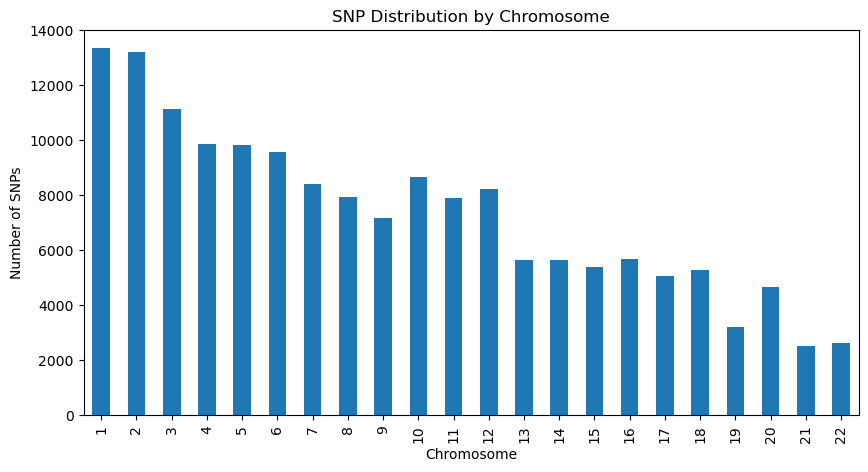

In [62]:
# Plot SNP count per chromosome
bim_df["Chromosome"].value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.xlabel("Chromosome")
plt.ylabel("Number of SNPs")
plt.title("SNP Distribution by Chromosome")
plt.show()